In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

### Linear regression without intercept

In [2]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
data = pd.DataFrame({'x': x, 'y': y})
data

,x,y
0,0.345584,0.039887
1,0.821618,2.505681
2,0.330437,0.535282
3,-1.303157,-1.937161
4,0.905356,3.029555
...,...,...
95,-2.250854,-6.119176
96,-0.138655,0.832327
97,0.033000,0.234106
98,-1.425349,-2.302292


In [3]:
X = MS(['x'], intercept=False).fit_transform(data)
X.head()

,x
0,0.345584
1,0.821618
2,0.330437
3,-1.303157
4,0.905356


In [4]:
model = sm.OLS(y, X)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
x,1.9762,0.117,16.898,0.0


In [5]:
Y = MS(['y'], intercept=False).fit_transform(data)
Y.head()

,y
0,0.039887
1,2.505681
2,0.535282
3,-1.937161
4,3.029555


In [6]:
model2 = sm.OLS(x, Y)
result2 = model2.fit()
summarize(result2)

,coef,std err,t,P>|t|
y,0.3757,0.022,16.898,0.0


### Collinearity 

In [7]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = .5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + .3 * x2 + rng.normal(size=100)
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data

,x1,x2,y
0,0.956002,0.469359,4.356977
1,0.207682,0.142509,3.677789
2,0.828445,0.587699,3.482079
3,0.149282,0.181141,2.369093
4,0.512805,0.236458,1.413295
...,...,...,...
95,0.427256,0.273142,3.940722
96,0.790513,0.456659,3.460998
97,0.531602,0.236308,3.355095
98,0.013037,0.054343,2.336922


In [8]:
X = MS(['x1', 'x2'], intercept=False).fit_transform(data)
X.head()

,x1,x2
0,0.956002,0.469359
1,0.207682,0.142509
2,0.828445,0.587699
3,0.149282,0.181141
4,0.512805,0.236458


In [9]:
y = data['y']
y.head()

0    4.356977
1    3.677789
2    3.482079
3    2.369093
4    1.413295
Name: y, dtype: float64

In [10]:
model = sm.OLS(y, X)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
x1,5.0371,0.590,8.535,0.000
x2,0.1133,1.192,0.095,0.924


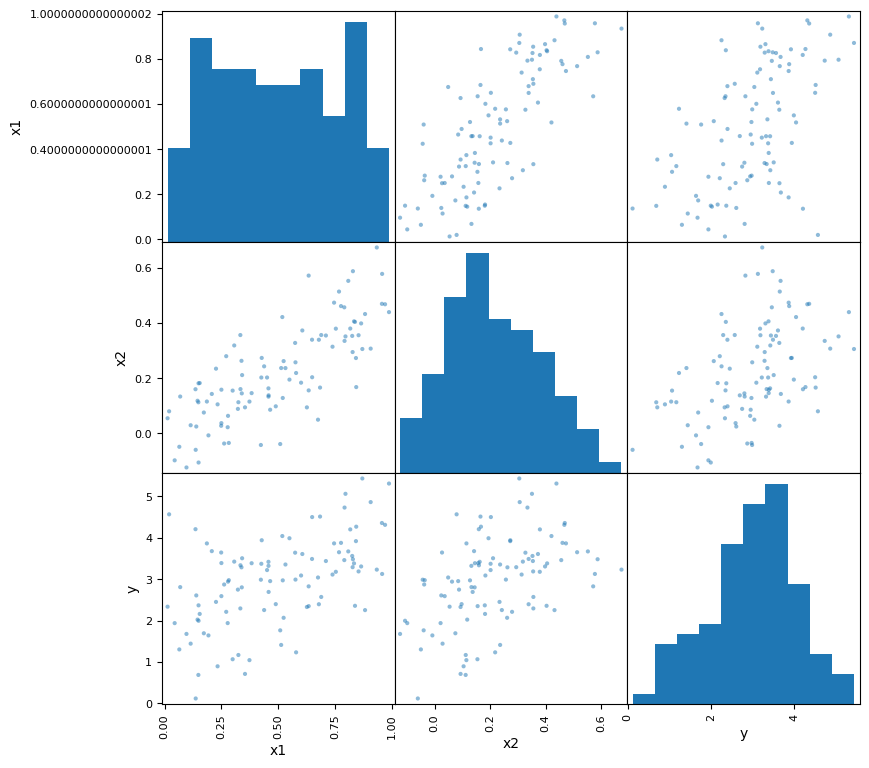

In [11]:
pd.plotting.scatter_matrix(data, figsize=(9, 9));

In [12]:
X = MS(['x1'], intercept=False).fit_transform(data)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
x1,5.0887,0.231,22.075,0.0


In [13]:
X = MS(['x2'], intercept=False).fit_transform(data)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
x2,9.4697,0.615,15.406,0.0


In [39]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data.tail()

,x1,x2,y
97,0.531602,0.236308,3.355095
98,0.013037,0.054343,2.336922
99,0.019875,0.079619,4.566538
100,0.100000,0.800000,6.000000
101,0.100000,0.800000,6.000000


In [43]:
X = MS(['x1', 'x2'], intercept=False).fit_transform(data)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
x1,3.4683,0.491,7.071,0.0
x2,3.5966,0.919,3.916,0.0


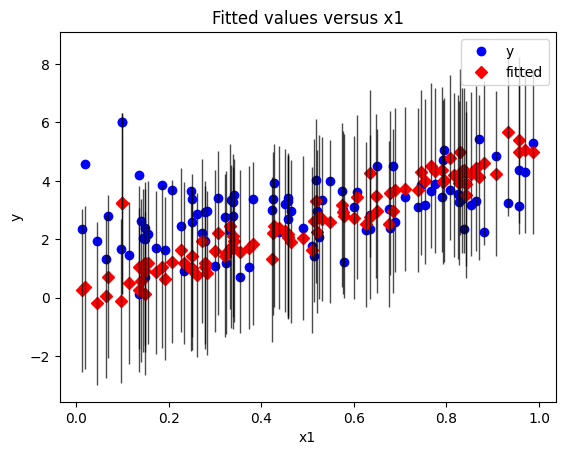

In [44]:
smg.plot_fit(result, 0);

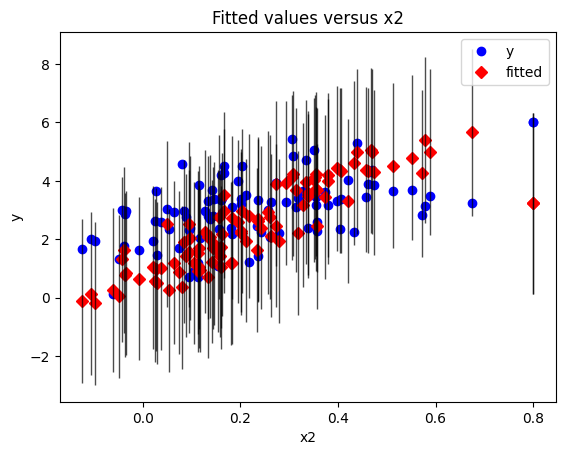

In [45]:
smg.plot_fit(result, 1);

In [42]:
X = MS(['x1'], intercept=False).fit_transform(data)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
x1,5.1232,0.266,19.255,0.0


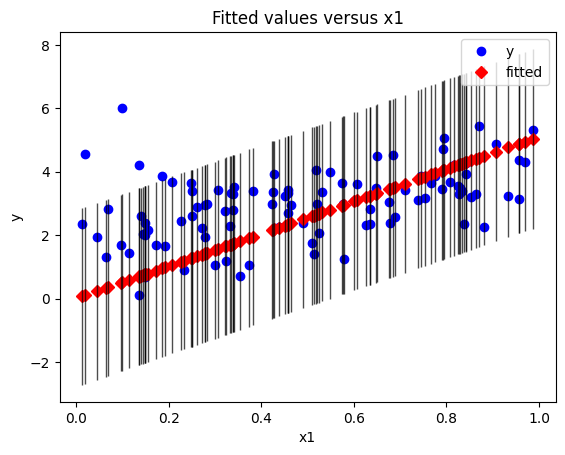

In [32]:
smg.plot_fit(result, 0);

In [33]:
X = MS(['x2'], intercept=False).fit_transform(data)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
x2,9.3204,0.59,15.79,0.0


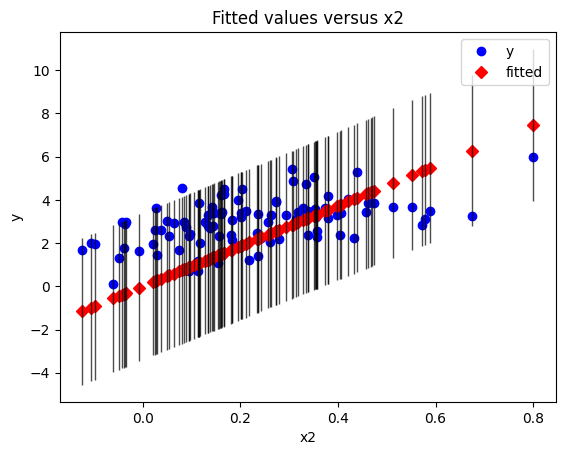

In [34]:
smg.plot_fit(result, 0);

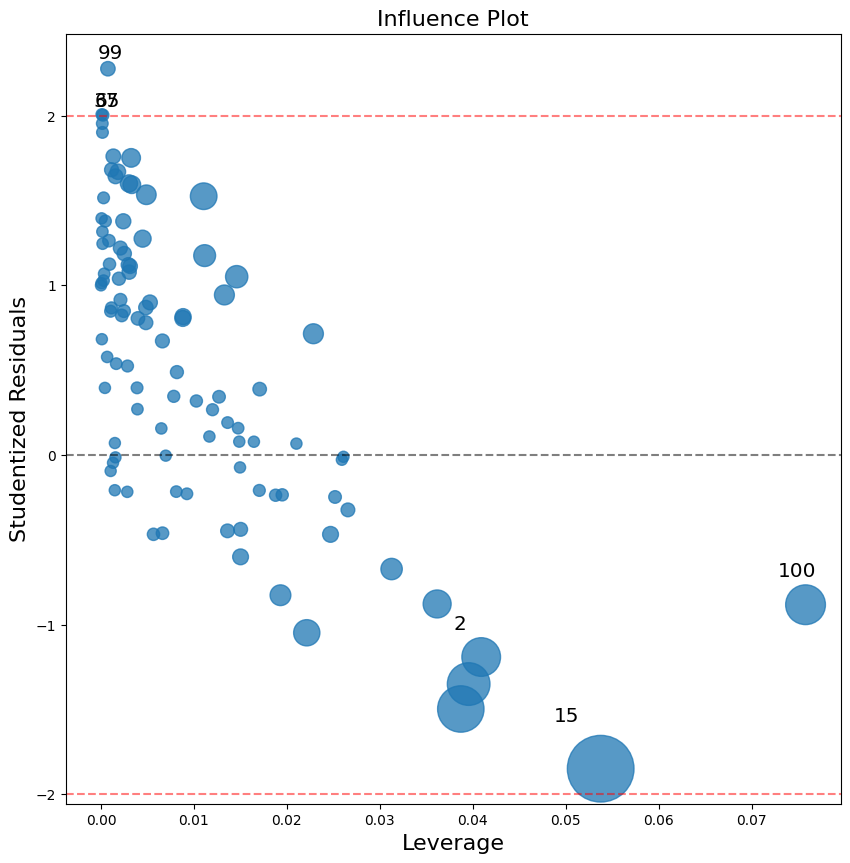

In [23]:
_, ax = plt.subplots(figsize=(10, 10))
smg.influence_plot(result, ax=ax)
ax.axhline(0, c='k', linestyle='--', alpha=.5)
ax.axhline(2, c='r', linestyle='--', alpha=.5)
ax.axhline(-2, c='r', linestyle='--', alpha=.5);
# remove all labels
# for txt in ax.texts:
#     txt.set_visible(False)